In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Recolección y Preprocesamiento de Datos


In [2]:
df = pd.read_csv('ML_cars.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [21]:
# Calcular la media de precios
mean_price = df['price'].mean()
print(f"Media de los precios: {mean_price}")


Media de los precios: 13276.710570731706


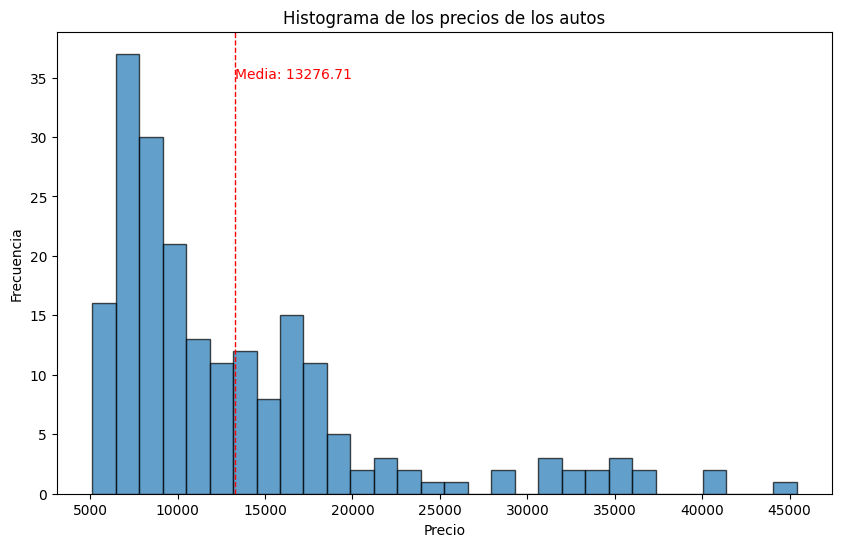

In [22]:
# Crear el histograma de los precios
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=1)

# Añadir etiquetas y título
plt.title('Histograma de los precios de los autos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.text(mean_price, plt.ylim()[1]*0.9, f'Media: {mean_price:.2f}', color='red')

# Mostrar el gráfico
plt.show()


In [4]:
# Identificar columnas categóricas y numéricas
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print(f"Columnas categóricas: {categorical_columns}")
print(f"Columnas numéricas: {numerical_columns}")

# Contar las categorías únicas en cada columna categórica
unique_categories = df[categorical_columns].nunique()
print("Categorías únicas en columnas categóricas:")
print(unique_categories)

Columnas categóricas: Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
Columnas numéricas: Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
Categorías únicas en columnas categóricas:
CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64


## Creamos un primer modelo de Arbol de desiciones de regresión lineal

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Seleccionar columnas relevantes
features = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
            'curbweight', 'enginesize', 'boreratio', 'stroke',
            'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
            'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
            'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
target = 'price'

# Convertir columnas categóricas a numéricas usando one-hot encoding
df_encoded = pd.get_dummies(df[features])

# Separar características y objetivo
X = df_encoded
y = df[target]

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de árbol de decisiones
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

# Para visualizar la importancia de las características
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)

Error cuadrático medio (MSE): 8968946.209802171
                  feature    importance
6              enginesize  6.491137e-01
5              curbweight  2.656040e-01
10             horsepower  1.596876e-02
8                  stroke  1.529846e-02
13             highwaympg  1.401496e-02
3                carwidth  1.320538e-02
11                peakrpm  1.095106e-02
4               carheight  6.057385e-03
12                citympg  1.937727e-03
22      carbody_hatchback  1.565012e-03
9        compressionratio  1.357138e-03
2               carlength  1.284147e-03
33         enginetype_ohc  7.196182e-04
7               boreratio  6.932842e-04
0               symboling  6.803558e-04
1               wheelbase  6.135799e-04
35        enginetype_ohcv  4.916004e-04
25         drivewheel_4wd  2.541099e-04
23          carbody_sedan  1.081220e-04
19         doornumber_two  2.785599e-05
18        doornumber_four  2.379974e-05
15           fueltype_gas  2.332367e-05
50        fuelsystem_spdi  2.047

In [6]:
# Crear un DataFrame con las importancias de las características
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})

# Ordenar el DataFrame por la importancia de las características en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Imprimir el DataFrame completo
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
print(feature_importance_df)

                  feature    importance
0              enginesize  6.491137e-01
1              curbweight  2.656040e-01
2              horsepower  1.596876e-02
3                  stroke  1.529846e-02
4              highwaympg  1.401496e-02
5                carwidth  1.320538e-02
6                 peakrpm  1.095106e-02
7               carheight  6.057385e-03
8                 citympg  1.937727e-03
9       carbody_hatchback  1.565012e-03
10       compressionratio  1.357138e-03
11              carlength  1.284147e-03
12         enginetype_ohc  7.196182e-04
13              boreratio  6.932842e-04
14              symboling  6.803558e-04
15              wheelbase  6.135799e-04
16        enginetype_ohcv  4.916004e-04
17         drivewheel_4wd  2.541099e-04
18          carbody_sedan  1.081220e-04
19         doornumber_two  2.785599e-05
20        doornumber_four  2.379974e-05
21           fueltype_gas  2.332367e-05
22        fuelsystem_spdi  2.047620e-06
23         drivewheel_rwd  1.827265e-06


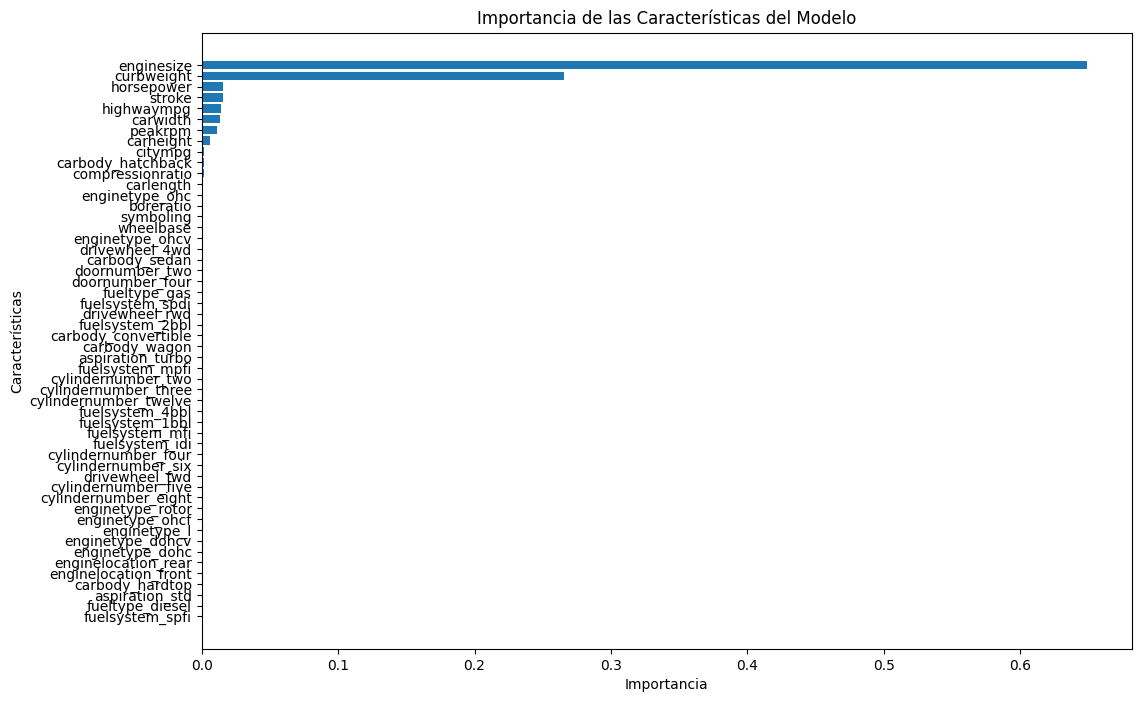

In [7]:
# Crear una gráfica de barras
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características del Modelo')
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén arriba
plt.show()

## De las variables anteriores seleccionamos las 9 más importantes para utilizar en nuestros modelos

In [14]:
# Seleccionar las 9 características más importantes
top_features = feature_importance_df['feature'][:9].tolist()
print(f"Top 9 características más importantes: {top_features}")


Top 9 características más importantes: ['enginesize', 'curbweight', 'horsepower', 'stroke', 'highwaympg', 'carwidth', 'peakrpm', 'carheight', 'citympg']


In [15]:
# Crear un nuevo DataFrame solo con las 9 características más importantes
X_top_features = df_encoded[top_features]


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de árbol de decisiones
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Coeficiente de determinación (R²): {r2}")


Error cuadrático medio (MSE): 7515757.484192415
Error absoluto medio (MAE): 1836.9430975609757
Coeficiente de determinación (R²): 0.9047963683576563


## Arbol de Decisión para Clasificación
### Clasificamos los autos según su valor en Bajo o Alto teniendo como punto de partición la media

In [17]:
# Calcular la media de precios
mean_price = df['price'].mean()

# Crear una nueva columna de categorías de precio (Bajo o Alto)
df['price_category'] = np.where(df['price'] <= mean_price, 'Bajo', 'Alto')

# Ver las primeras filas para verificar
print(df[['price', 'price_category']].head())


     price price_category
0  13495.0           Alto
1  16500.0           Alto
2  16500.0           Alto
3  13950.0           Alto
4  17450.0           Alto


In [18]:
# Crear el DataFrame solo con las 9 características más importantes
X_top_features = df_encoded[top_features]
y_class = df['price_category']


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y_class, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de árbol de decisiones
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)


Matriz de confusión:
[[13  0]
 [ 2 26]]
Informe de clasificación:
              precision    recall  f1-score   support

        Alto       0.87      1.00      0.93        13
        Bajo       1.00      0.93      0.96        28

    accuracy                           0.95        41
   macro avg       0.93      0.96      0.95        41
weighted avg       0.96      0.95      0.95        41



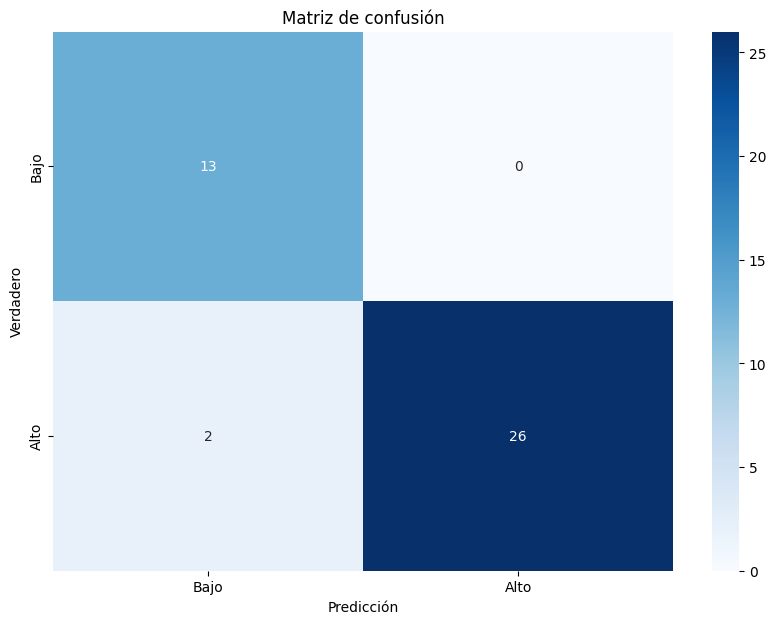

In [20]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Crear el informe de clasificación
cr = classification_report(y_test, y_pred)
print("Informe de clasificación:")
print(cr)

# Visualizar la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bajo', 'Alto'], yticklabels=['Bajo', 'Alto'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de confusión')
plt.show()


## Clasificación de Autos en Categorías de Precio (Bajo y Alto)
#### Matriz de Confusión:

La matriz de confusión indica que el modelo clasificador ha identificado correctamente 13 autos como "Alto" y 26 autos como "Bajo".
Hubo 2 casos de autos clasificados erróneamente como "Alto" cuando deberían haber sido "Bajo".

#### Informe de Clasificación:

##### Precisión (Precision):
Para la clase "Alto" es 0.87, lo que significa que el 87% de las veces que el modelo predijo "Alto", estaba en lo correcto.
Para la clase "Bajo" es 1.00, lo que indica una precisión perfecta para esta clase.
##### Exhaustividad (Recall):
Para la clase "Alto" es 1.00, lo que significa que el modelo identificó correctamente todos los casos de "Alto".
Para la clase "Bajo" es 0.93, lo que indica que el modelo identificó correctamente el 93% de los casos de "Bajo".
##### F1-Score:
Para la clase "Alto" es 0.93, lo que refleja un buen equilibrio entre precisión y exhaustividad.
Para la clase "Bajo" es 0.96, lo que indica un excelente equilibrio entre precisión y exhaustividad.
##### Exactitud (Accuracy):
El modelo tiene una exactitud del 95%, lo que significa que el 95% de las predicciones fueron correctas.
##### Promedio Macro y Promedio Ponderado:
Ambos promedios (macro y ponderado) son altos, indicando un buen rendimiento general del modelo en ambas clases.

##### Conclusiones Generales
##### Clasificación:

El modelo clasificador ha mostrado un rendimiento excelente en la clasificación de autos en categorías de precio bajo y alto, con una precisión, exhaustividad y F1-score muy altos, especialmente para la clase "Bajo".

## Creamos 3 modelos de Regresión Lineal (Regresión Lineal, Arbol de Decisión y XGBoost) y los comparamos

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Crear el DataFrame solo con las 9 características más importantes
X_top_features = df_encoded[top_features]
y = df['price']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Entrenar el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluar el modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Regresión Lineal - Error cuadrático medio (MSE): {mse_linear}")
print(f"Regresión Lineal - Error absoluto medio (MAE): {mae_linear}")
print(f"Regresión Lineal - Coeficiente de determinación (R²): {r2_linear}")


Regresión Lineal - Error cuadrático medio (MSE): 13952104.49938959
Regresión Lineal - Error absoluto medio (MAE): 2713.047336481296
Regresión Lineal - Coeficiente de determinación (R²): 0.8232658490925083


In [26]:
import xgboost as xgb

# Entrenar el modelo de XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluar el modelo
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Error cuadrático medio (MSE): {mse_xgb}")
print(f"XGBoost - Error absoluto medio (MAE): {mae_xgb}")
print(f"XGBoost - Coeficiente de determinación (R²): {r2_xgb}")


XGBoost - Error cuadrático medio (MSE): 4903704.230759814
XGBoost - Error absoluto medio (MAE): 1554.492520769817
XGBoost - Coeficiente de determinación (R²): 0.9378837792131842


In [28]:
from sklearn.tree import DecisionTreeRegressor

# Entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_tree = tree_model.predict(X_test_scaled)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Árbol de Decisión - Error cuadrático medio (MSE): {mse_tree}")
print(f"Árbol de Decisión - Error absoluto medio (MAE): {mae_tree}")
print(f"Árbol de Decisión - Coeficiente de determinación (R²): {r2_tree}")


Árbol de Decisión - Error cuadrático medio (MSE): 7515757.484192415
Árbol de Decisión - Error absoluto medio (MAE): 1836.9430975609757
Árbol de Decisión - Coeficiente de determinación (R²): 0.9047963683576563


In [29]:

# Crear un DataFrame con los resultados de cada modelo
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'XGBoost', 'Árbol de Decisión'],
    'MSE': [mse_linear, mse_xgb, mse_tree],
    'MAE': [mae_linear, mae_xgb, mae_tree],
    'R²': [r2_linear, r2_xgb, r2_tree]
})

# Mostrar los resultados
print(results)

              Modelo           MSE          MAE        R²
0   Regresión Lineal  1.395210e+07  2713.047336  0.823266
1            XGBoost  4.903704e+06  1554.492521  0.937884
2  Árbol de Decisión  7.515757e+06  1836.943098  0.904796


### Comparación de Modelos de Regresión

#### Modelo de Regresión Lineal:

El modelo de Regresión Lineal muestra un error cuadrático medio relativamente alto y un R² de 0.823, lo que indica que el modelo explica el 82.3% de la variabilidad en los precios. Sin embargo, tiene un error absoluto medio de 2,713.05, lo que sugiere que las predicciones pueden ser inexactas en un promedio de 2,713 unidades monetarias.

#### Modelo XGBoost:

El modelo XGBoost tiene el mejor rendimiento entre los modelos evaluados. Tiene el menor error cuadrático medio (MSE) y el menor error absoluto medio (MAE), lo que indica predicciones más precisas. Con un R² de 0.938, el modelo explica el 93.8% de la variabilidad en los precios.

#### Modelo de Árbol de Decisión:

El modelo de Árbol de Decisión también muestra un buen rendimiento con un MSE de 7,515,757 y un MAE de 1,836.94. Su R² de 0.905 indica que el modelo explica el 90.5% de la variabilidad en los precios, lo que es un rendimiento sólido, pero no tan bueno como el modelo XGBoost.



### Conclusiones Generales
#### Clasificación:

El modelo clasificador ha mostrado un rendimiento excelente en la clasificación de autos en categorías de precio bajo y alto, con una precisión, exhaustividad y F1-score muy altos, especialmente para la clase "Bajo".
#### Regresión:

De los modelos de regresión evaluados, el modelo XGBoost ha mostrado el mejor rendimiento, con el menor error y la mayor capacidad explicativa (R²).
El modelo de Regresión Lineal, aunque útil, no es tan preciso como los modelos más complejos como XGBoost y el Árbol de Decisión.
El modelo de Árbol de Decisión es una opción sólida, pero aún así, XGBoost ofrece mejores resultados.
#### Recomendaciones:

Para predicciones de precio, se recomienda utilizar el modelo XGBoost debido a su alta precisión y bajo error.
Para tareas de clasificación, el modelo actual es muy efectivo, con una exactitud del 95%. Sin embargo, si se busca mejorar la precisión en la clase "Alto", se pueden explorar técnicas adicionales de ajuste fino del modelo.
Esta evaluación proporciona una base sólida para la toma de decisiones sobre qué modelo utilizar en función de las necesidades específicas del análisis de mercado para la automotriz.